# An Algorithm for Single-Term Equations

## Introduction

The method can be called *indirect*

$$
D_{*0}^{n} y(x) = f(x, y(x))
$$

with appropriate initial conditions

$$
D^{k} y(0) = y_0^{(k)}, \quad k=0,1,\cdots,\lceil n\rceil - 1
$$

applicated **Lemma 6.2**, in order to convert the initial value problem for the differential equation into an equivalent **Volterra integral equation**,

$$
y(x) = \sum_{k=0}^{m-1} \frac{x^k}{k!} D^k y(0) + \frac{1}{\Gamma(n)} \int_0^x (x-t)^{n-1} f(t, y(t)) \mathrm{d} t
$$

where $m=\lceil n\rceil$.

The algorithm that we shall consider can be interpreted as a frational variant of the classical second-order **Adams–Bashforth–Moulton method**.

### Integral Scheme

We focus our attention on the well-known initial-value problem for the first-order differnetial equation

$$\begin{cases}
D y(x) &= f(x, y(x)) \\
y(0) &= y_0
\end{cases}$$

We suggest to use the predictor-corrector technique of Adams, for the sake of simplicity, we assume that we are working on a uniform grid $\{t_j=jh: j=0,1,\cdots,N\}$ with some interger $N$ and $h=T/N$.

$$
y_{k+1} = y_k + \int_{x_k}^{x_{k+1}} f(t, y(t)) \mathrm{d} t
$$

explicit (forward Euler or one-step Adams–Bashforth) method

$$
y_{k+1}^{P} = y_{k} + h f(t_k, y_k)
$$

and the process into

$$
y_{k+1} = y_k + \frac{h}{2} \left(f(t_k, y_k) + f(t_{k+1}, y^P_{k+1})\right)
$$

### Fractional Scheme

Fractional Formulation

$$
y(x) = \sum_{k=0}^{m-1} \frac{x^k}{k!} D^k y(0) + \frac{1}{\Gamma(n)} \int_0^x (x-t)^{n-1} f(t, y(t)) \mathrm{d} t
$$

We apply the approximation

$$
\int_0^{t_{k+1}} (t_{k+1} - z)^{n-1} g(z) \mathrm{d} z \approx \int_0^{t_{k+1}} (t_{k+1} - z)^{n-1} \tilde{g}_{k+1}(z) \mathrm{d} z
$$

where $\tilde{g}$ is the piecewise linear interpolant for $g$ with nodes and knots chosen at the $t_j,\; j=0,1,2,\cdots,k+1$.

re-write as

$$
\int_0^{t_{k+1}} (t_{k+1}-z)^{n-1} \tilde{g}_{k+1} \mathrm{d}z = \sum_{j=0}^{k+1} a_{j,k+1} g(t_j)
$$

where

$$
a_{j,k+1} = \int_0^{t_{k+1}} (t_{k+1}-z)^{n-1} \phi_{j, k+1}(x) \mathrm{d}z
$$

and

$$
\phi_{j, k+1}(z)=\begin{cases}
    (z - t_{j-1}) / (t_j - t_{j-1}) & \text{ if } t_{j-1} < z \leq t_{j} \\
    (t_{j+1} - z) / (t_{j+1} - t_j) & \text{ if } t_{j} < z \leq t_{j+1} \\
    0 & \text{ else }
\end{cases}
$$

This is clear because the functions $\phi_{j, k+1}$ shown as

![](basis_fun_2.png)

![](basis_fun_0.png)

Finally, we have the iterative scheme shown as

$$\tag{1}
y_{k+1} = \sum_{j=0}^{m-1} \frac{t_{k+1}^{j}}{j!} y_0^{(j)} + \frac{1}{\Gamma(n)} \left(\sum_{j=0}^{k} a_{j, k+1} f(t_j, y_j) + a_{k+1, k+1} f(t_{k+1}, y_{k+1}^{P}) \right)
$$

predictor element $y_{k+1}^P$ follows

$$\tag{2}
y_{k+1}^{P} = \sum_{j=0}^{m-1} \frac{t_{k+1}^{j}}{j!} y_0^{(j)} + \frac{1}{\Gamma(n)} \sum_{j=0}^{k} b_{j, k+1} f(t_{j}, y_{j})
$$

where the parameters

$$\tag{3}
\begin{aligned}
    a_{j, k+1} &= \begin{cases}
        \frac{h^n}{n(n+1)} \left(k^{n+1}-(k-n)(k+1)^{n}\right) & \text{ if } j=0, \\
        \frac{h^n}{n(n+1)} \left((k-j+2)^{n+1}+(k-j)^{n+1}-2(k-j+1)^{n+1}\right) & \text{ if } 1\leq j\leq k, \\
        \frac{h^n}{n(n+1)} & \text{ if } j=k+1 \\
    \end{cases} \\
    b_{j,k+1} &= \begin{cases}
        \frac{h^n}{n} \left((k+1-j)^n-(k-j)^n\right) & \text{ if equispaced} \\
        \frac{(t_{k+1}-t_{j})^n - (t_{k+1}-t_{j+1})^n}{n} & \text{ else } \\
    \end{cases} \\
\end{aligned}
$$

## Packages

In [1]:
import numpy as np
import scipy as sp

In [2]:
from scipy.special import gamma

In [3]:
from fde.single import Adams
from fde.plot.config import *
from fde.error.order import error_table, iter_error_order

## Examples

### ex.1 two functions coincide at $x_1$ but nowhere else

**Theorem 6.A.** ...

**Example 6.1** Let $0 < n < 1$ and consider the fractional differential equations

$$
D_{*0}^{n} y(x) = \Gamma(n+1)
$$

with initial conditions $y_1(0)=0,\; y_2(1)=1$

#### Numerical

In [4]:
n = 1 / 4

In [5]:
test_11 = Adams(
    func=lambda t, y: gamma(n + 1),
    dy0=[np.array([0.])],
    dn=n,
    time_opt={
        "domain": np.array([0., 2.]),
        "n": 200
    }
)
y_data_11 = test_11.iterator()

In [6]:
test_12 = Adams(
    func=lambda t, y: gamma(n + 1),
    dy0=[np.array([1.])],
    dn=n,
    time_opt={
        "domain": np.array([1., 2.]),
        "n": 200
    }
)
y_data_12 = test_12.iterator()

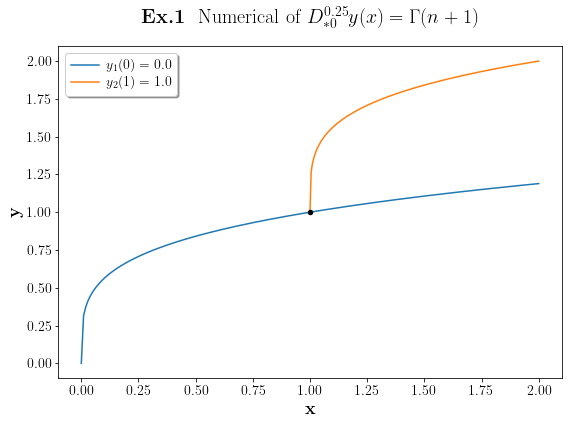

In [7]:
fig, ax = get_ax(
    title=f"\\textbf{{Ex.1 }} Numerical of $D_{{*0}}^{{{n}}}y(x)=\\Gamma(n+1)$"
)

ax.plot(
    test_11.t.seq, y_data_11,
    label=f"$y_1(0)={test_11.dy0[0, 0]}$"
)
ax.plot(
    test_12.t.seq, y_data_12, 
    label=f"$y_2(1)={test_12.dy0[0, 0]}$"
)

ax.scatter(
    [1.], y_data_12[0],
    color="black",
    s=20,
    zorder=3
)

set_ax(ax)

#### Analytical

In [8]:
t_seq_11 = test_11.t.seq
t_seq_12 = test_12.t.seq

y_analytic_11 = t_seq_11**n
y_analytic_12 = 1 + (t_seq_12 - 1.)**n

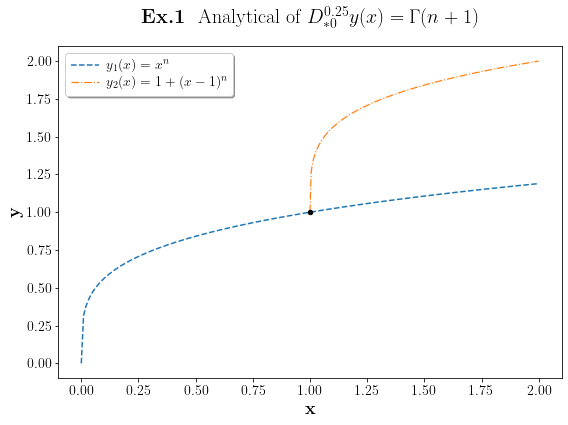

In [9]:
fig, ax = get_ax(
    title=f"\\textbf{{Ex.1 }} Analytical of $D_{{*0}}^{{{n}}}y(x)=\\Gamma(n+1)$"
)

ax.plot(
    t_seq_11, y_analytic_11,
    linestyle="--",
    label="$y_1(x)=x^n$"
)
ax.plot(
    test_12.t.seq, y_analytic_12, 
    linestyle="-.",
    label="$y_2(x)=1+(x-1)^n$",
    **line_style
)

ax.scatter(
    [1.], y_analytic_12[0],
    color="black",
    s=20,
    zorder=3
)

set_ax(ax)

#### Error Analysis

In [10]:
y_error_11 = y_data_11 - y_analytic_11
y_error_12 = y_data_12 - y_analytic_12

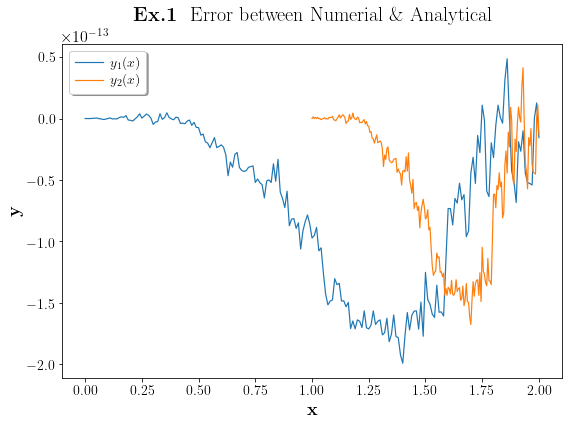

In [11]:
fig, ax = get_ax(
    title=r"\textbf{Ex.1 } Error between Numerial \& Analytical"
)

ax.plot(
    test_11.t.seq, y_error_11,
    label="$y_1(x)$",
    **line_style
)
ax.plot(
    test_12.t.seq, y_error_12, 
    label="$y_2(x)$",
    **line_style
)

set_ax(ax)

### ex.2

**Theorem 6.12.** ...

**Example 6.2** We verify the statement of Theorem 6.12 by looking at the differential equation

$$
D_{*0}^{0.28} y(x)=(0.5-x) \sin y(x) +0.8x^3
$$

with initial conditions 

$$
y_0(0)=1.7, y_1(0)=1.6, y_2(0)=1.5, y_3(0)=1.4, y_4(0)=1.3, y_5(0)=1.2
$$

#### Numerical

In [12]:
test_2 = Adams(
    func=lambda t, y: (0.5 - t) * np.sin(y) + 0.8 * t**3,
    dy0=[np.array([1.7, 1.6, 1.5, 1.4, 1.3, 1.2])],
    dn=0.28,
    time_opt={
        "domain": np.array([0., 1.]),
        "n": 200
    }
)
y_data_2 = test_2.iterator()

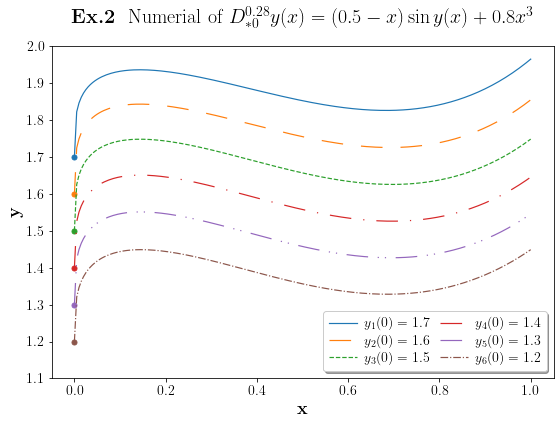

In [28]:
fig, ax = get_ax(
    title=r"\textbf{Ex.2 } Numerial of $D_{*0}^{0.28} y(x)=(0.5-x) \sin y(x) +0.8x^3$"
)

for i in range(y_data_2.shape[1]):
    ax.plot(
        test_2.t.seq, y_data_2[:, i],
        # color="black",
        linestyle=line_styles[i],
        label=f"$y_{i+1}(0)={test_2.dy0[0, i]}$",
        **line_style
    )
    ax.scatter(
        test_2.t.seq[0], y_data_2[0, i],
        s=25
    )

ax.set_ylim(1.1, 2.0)

ax.legend(
    ncol=2,
    **legend_style
)

### ex.3



$$
D_{*0}^{1/2} y(x)=\sin y(x), \quad y(1)=2.5
$$

with initial conditions

$$
y_1(0)=1., y_2(0)=2., y_3(0)=1.5, y_4(0)=1.75, y_5(0)=1.625, y_6(0)=1.6875, y_7(0)=1.71875
$$

#### Numerical

In [14]:
test_3 = Adams(
    func=lambda t, y: np.sin(y),
    dy0=[np.array([1., 2., 1.5, 1.75, 1.625, 1.6875, 1.71875])],
    dn=0.5,
    time_opt={
        "domain": np.array([0., 1.]),
        "n": 200
    }
)
y_data_3 = test_3.iterator()

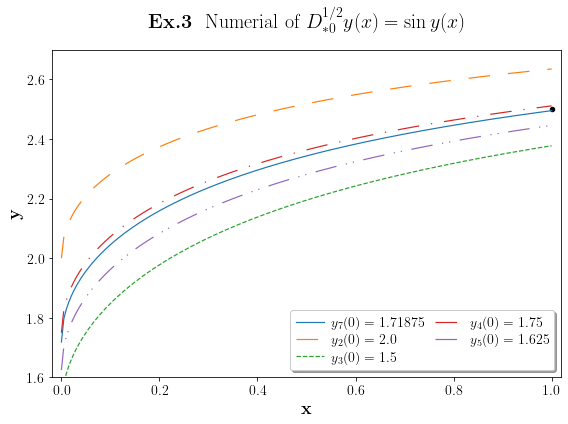

In [15]:
fig, ax = get_ax(
    title=r"\textbf{Ex.3 } Numerial of $D_{*0}^{1/2} y(x)=\sin y(x)$"
)

plot_list = [6, 1, 2, 3, 4]

for k, i in enumerate(plot_list):
    ax.plot(
        test_3.t.seq, y_data_3[:, i],
        # color="black",
        linestyle=line_styles[k],
        label=f"$y_{i+1}(0)={test_3.dy0[0, i]}$",
        **line_style
    )
    
ax.scatter(
    [1.], [2.5],
    color="black",
    s=20
)
    
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(1.6, 2.7)

ax.legend(
    ncol=2,
    **legend_style
)

### ex.4

$$
D_{*0}^n y(x) = \frac{40320}{\Gamma(9-n)} x^{8-n} - 3\frac{\Gamma(5+n/2)}{\Gamma(5+n/2)} x^{4-n/2} + \frac{9}{4}\Gamma(n+1) + \left(\frac{3}{2} x^{n/2} - x^4\right) - [y(x)]^{3/2},\quad x\in [0, 1], n > 1
$$

with initial condition $y(0)=0, y'(0)=0$.

The exact solution of this initial value problem is

$$
y(x) = x^8 - 3 x^{4+n/2} + \frac{9}{4} x^n
$$

hence

$$
D_{*0}^n y(x) = \frac{40320}{\Gamma(9-n)} x^{8-n} - 3\frac{\Gamma(5+n/2)}{\Gamma(5+n/2)} x^{4-n/2} + \frac{9}{4}\Gamma(n+1)
$$

#### Numerical

In [16]:
n = 1.25

def fun_4(t, y):
    expr1 = 40320/gamma(9-n) * t**(8-n)
    expr2 = 3 * gamma(5+n/2) / gamma(5-n/2) * t**(4-n/2)
    expr3 = 9/4 * gamma(n + 1)
    expr4 = (3/2 * t**(n/2) - t**4)**3
    expr5 = y**(3/2)
    return expr1 - expr2 + expr3 + expr4 - expr5

In [77]:
test_4 = Adams(
    func=fun_4,
    dy0=[np.array([0]), np.array([0])],
    dn=n,
    time_opt={
        "domain": np.array([0., 1.]),
        "n": 200
    }
)
y_data_4 = test_4.iterator()

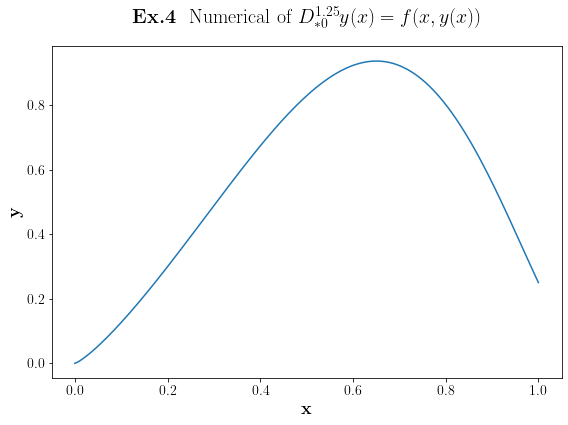

In [78]:
fig, ax = get_ax(
    title=f"\\textbf{{Ex.4 }} Numerical of $D_{{*0}}^{{{n}}}y(x)=f(x, y(x))$"
)

ax.plot(
    test_4.t.seq, y_data_4,
    # marker=".", markersize=12,
    # markevery=0.05
)

set_ax(ax, legend=False)

#### Analytical

In [79]:
t_seq_4 = test_4.t.seq
# t_seq_4 = np.linspace(0, 1., 201)

y_analytic_4 = t_seq_4**8 - 3 * t_seq_4**(4+n/2) + 9/4 * t_seq_4**n

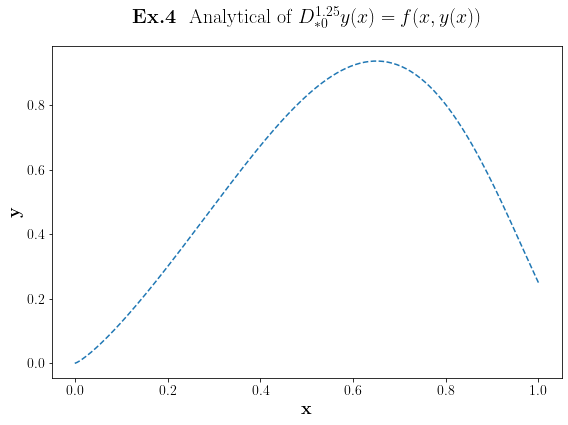

In [80]:
fig, ax = get_ax(
    title=f"\\textbf{{Ex.4 }} Analytical of $D_{{*0}}^{{{n}}}y(x)=f(x, y(x))$"
)

ax.plot(
    t_seq_4, y_analytic_4,
    linestyle="--"
)

set_ax(ax, legend=False)

#### Error Analysis

In [81]:
y_error_4 = y_data_4 - y_analytic_4

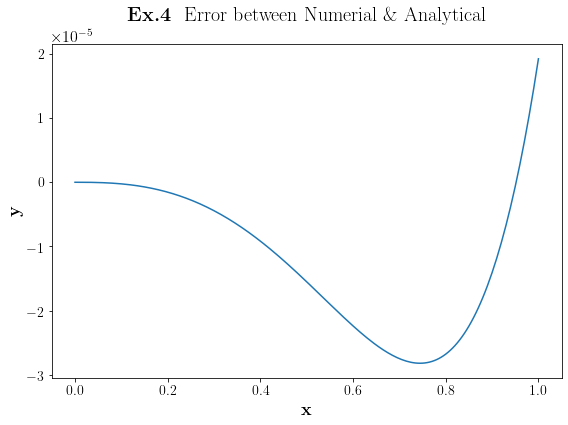

In [82]:
fig, ax = get_ax(
    title="\\textbf{{Ex.4 }} Error between Numerial \& Analytical"
)

ax.plot(
    t_seq_4, y_error_4,
    linestyle="-"
)

set_ax(ax, legend=False)

#### Error Order

In [23]:
iter_step = 7
step_n = 10

y_4_end_list = iter_error_order(
    module=Adams, 
    parameters={
        "func": fun_4,
        "dy0": [np.array([0]), np.array([0])],
        "dn": n,
        "time_opt": {
            "domain": np.array([0., 1.]),
            "n": step_n
        }
    }, 
    iter_name="time_opt", 
    iter_step=iter_step, 
    iter_func=lambda opt: dict(opt, n=opt["n"] * 2),
    collect_func=lambda opt, out: [opt["n"], out[-1] - y_analytic_4[-1]]
)

In [24]:
order_info_table, order_info = error_table(y_4_end_list)

In [25]:
print(order_info_table.get_string())

+-----------+-----------------------+-------------+
| step size | Error of Adams scheme | Error Order |
+-----------+-----------------------+-------------+
|     10    |      5.532564e-03     |             |
|     20    |      1.593218e-03     |    1.7960   |
|     40    |      4.328280e-04     |    1.8801   |
|     80    |      1.143382e-04     |    1.9205   |
|    160    |      2.974073e-05     |    1.9428   |
|    320    |      7.663078e-06     |    1.9564   |
|    640    |      1.961993e-06     |    1.9656   |
+-----------+-----------------------+-------------+
